In [1]:
import cv2  
from matplotlib import pyplot as plt
import numpy as np

plt.rcParams['figure.figsize'] = (10.0, 10.0)
img = cv2.imread("../pics/shot.png")  
 
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)  
ret, binary = cv2.threshold(gray,127,255,cv2.THRESH_BINARY)  
 
contours, hierarchy = cv2.findContours(binary, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
# contours = np.asarray(contours)
# grid = contours[hierarchy[0, :, 2]==-1]  

In [2]:
quads = [] #array of quad including four peak points
hulls = []

for i in range(len(contours)):
    if (contours[i].shape[0] >= 4):
        area = cv2.contourArea(contours[i])
        if area > 500 and area < 2000:
            hull = cv2.convexHull(contours[i])
            # hulls.append(hull)     
            if (area / cv2.contourArea(hull) > 0.8):
                hulls.append(hull)                
                quad = cv2.approxPolyDP(hull, 15, True) #maximum_area_inscribed
                if (len(quad) == 4):
                    quads.append(quad)
                    # areaqued = cv2.contourArea(quad)
                    # areahull = cv2.contourArea(hull)
                    # if areaqued / areahull > 0.6 and areahull >= areaqued:
                        # quads.append(quad)

In [3]:
quad_arr = np.asarray(quads).squeeze()
ind = np.lexsort((quad_arr[:, :, 1],quad_arr[:, :, 0]), axis=1) # sort convex
ind = np.expand_dims(ind, -1)
# ind.shape
arr = np.take_along_axis(quad_arr, ind, axis=1)
que = np.lexsort((arr[:, 0, 1],arr[:, 0, 0]), axis=0) # sort quads
quad_arr = quad_arr[que]
dy = (2.3*(arr[:, 0]- arr[:, 1]).mean(axis=0)).round().astype('int')
dx = (2.3*(arr[:, 0]- arr[:, 2]).mean(axis=0)).round().astype('int')
dx, dy

(array([-70,  -6]), array([-6, 69]))

In [4]:
nei = []
for d in [dx, -dx, dy, -dy]:
    for i in range(quad_arr.shape[0]):
        mask = np.zeros(gray.shape,np.uint8)
        cv2.drawContours(mask, quad_arr+d, i, 1, -1)
        pv = (mask*binary).sum()
        if pv < 3:
            print(i)
            nei.append(quad_arr[i])
            break



141
112
127
126


In [5]:
center = np.asarray(nei)
center = center.mean(axis=0).astype('int')
center = np.expand_dims(center, 0)

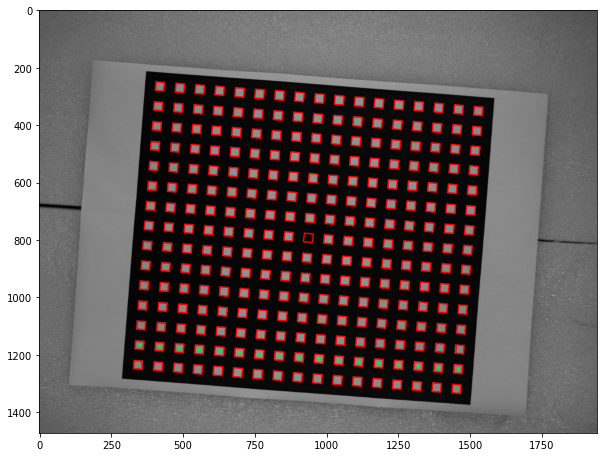

In [61]:
full_arr = np.concatenate((quad_arr[:127], center, quad_arr[127:]))
grid_arr = full_arr.mean(axis=1).round().astype('int')
sy = ((grid_arr*(-dy)).sum(axis=1)//3000).squeeze()
sx = ((grid_arr*(-dx)).sum(axis=1)//3000).squeeze()
indice = np.lexsort((sx, sy))
grid_arr = grid_arr[indice]
grid_arr = np.expand_dims(grid_arr, 1)
pic = img.copy()
cv2.drawContours(pic, full_arr, -1, (255,0,0), 4)  
cv2.drawContours(pic, grid_arr[17:34], -1, (0,255,0), 10)  
plt.imshow(pic)
plt.imsave("graph/holes.png", pic)
plt.show()

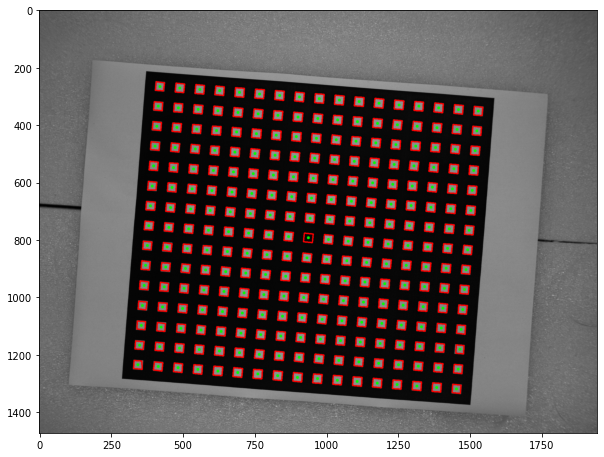

In [30]:
full_arr = np.concatenate((quad_arr[:127], center, quad_arr[127:]))
grid_arr = full_arr.mean(axis=1).round().astype('int')
# grid_arr = full_arr.mean(axis=1).astype('int')
grid_arr = np.expand_dims(grid_arr, 1)
pic = img.copy()
cv2.drawContours(pic, full_arr, -1, (255,0,0), 4)  
cv2.drawContours(pic, grid_arr, -1, (0,255,0), 10)  
plt.imshow(pic)
plt.imsave("graph/holes.png", pic)
plt.show()

In [112]:
quad_arr[12]

array([[397, 388],
       [426, 391],
       [424, 419],
       [394, 416]], dtype=int32)

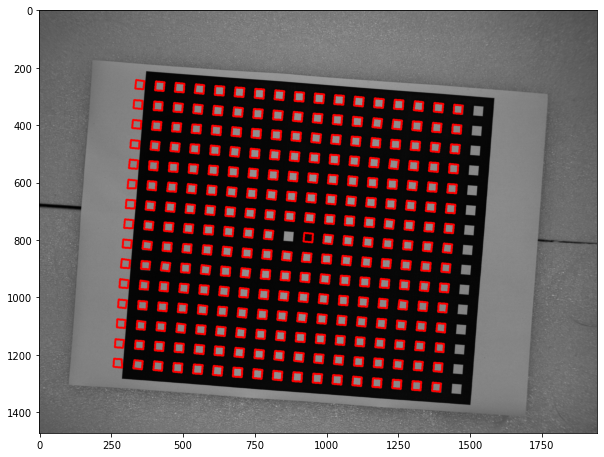

In [120]:
pic = img.copy()
# cv2.drawContours(pic, center, -1, (0,255,0), 5) 
cv2.drawContours(pic, quad_arr+dx, -1, (255,0,0), 5)  
plt.imshow(pic)
plt.show()

In [31]:
mask = np.zeros(gray.shape,np.uint8)
cv2.drawContours(mask, quad_arr-dx, -1, 1, -1)
# pixelpoints = np.transpose(np.nonzero(mask))
# pixelpoints = cv2.findNonZero(mask)

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

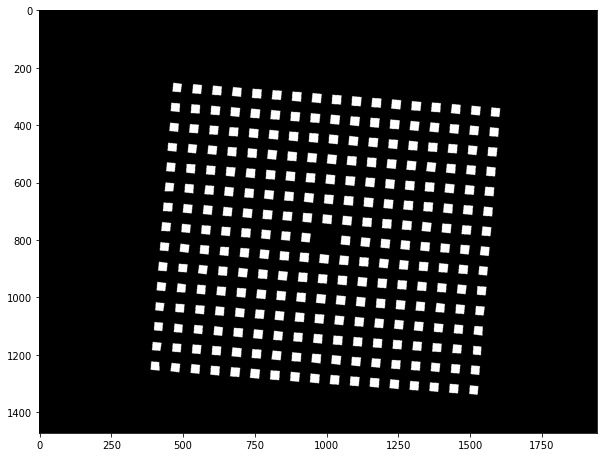

In [35]:
plt.imshow(mask, 'gray')
plt.show()